In [12]:
import limpy.utils as lu
import limpy.lines as ll
import numpy as np

In [5]:
ngrid= 256             
boxsize = 205    
pk_noise = 4e9 #Jy/Sr * Mpc^3

In [47]:
# make a 3D noise grid analogous to the 3D signal grid.

Noise = lu.get_noise_grid(pk_noise, 
                  boxsize_x=boxsize,
                  boxsize_y=boxsize,
                  boxsize_z=boxsize,
                  ngrid_x= ngrid,
                  ngrid_y= ngrid, 
                  ngrid_z= ngrid)

Calculating Fourier Transform to generate noise grid
Calculating Inverse Fourier Transform to generate noise grid


In [9]:
nu_obs = 220 # the observational frequency 
dnu_obs = 2.2 # frequency resolution
fwhm_arcmin = 1.5 # FWHM of beam in arc-minute

halo_file = "../data/" + 'halos_L205_z7.00.npz'

z = 7.00  # redshift of catalog
line_name = "CII158" # line name that you want to paint

model_name="Fonseca16"  # line luminosity model name
sfr_model="Behroozi19" # sfr model name 
mmin=1e11              # minimum mass of the halos
small_h = 0.68         # value of Hubble parameter. H0 = 100 * small_h
halocat_file_type="input_cat" # 
ngrid= 256             # numer of grid points along the all three exes
boxsize = 205          # Length of the box 


Ig_beam=ll.make_intensity_grid(halo_file, 
                           z,
                           sfr_model=sfr_model,
                           model_name= model_name,
                           line_name = line_name, 
                           halo_cutoff_mass= mmin, 
                           halocat_type=halocat_file_type,
                           ngrid_x = ngrid, 
                           ngrid_y = ngrid, 
                           ngrid_z = ngrid, 
                           boxsize_x=boxsize,
                           boxsize_y=boxsize,
                           boxsize_z=boxsize,
                           nu_obs = nu_obs,
                           dnu_obs = dnu_obs,
                           theta_fwhm = fwhm_arcmin)

In [14]:
np.shape(Ig_beam)

(256, 256, 4)

In [22]:
# plot noise + signal
ngridz = np.shape(Ig_beam)[2]
noise_2d = np.mean(Noise[:, :, :int(ngrid/ngridz)], axis =2)

signal_plus_noise = Ig_beam[:,:,0] + noise_2d


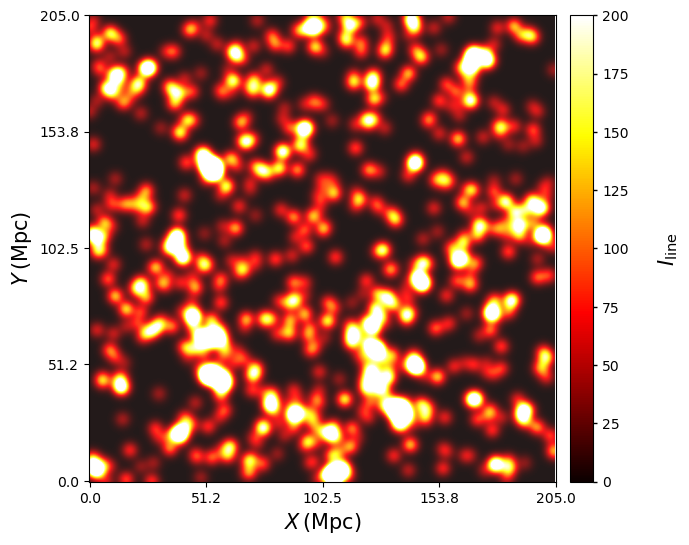

In [23]:
#plot signal only
ll.plot_beam_convolution(Ig_beam[:,:,0], ngrid, boxsize, 
                           z, cmap="hot", plot_scale="lin", vmax=200, vmin=0)

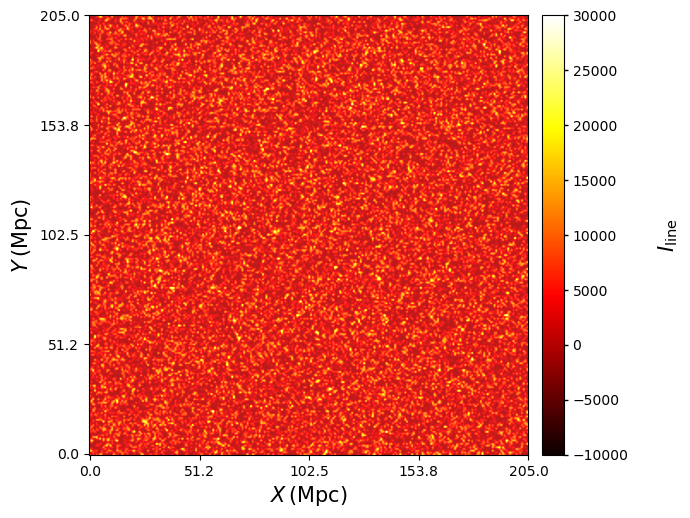

In [46]:
#plot signal + beam + Noise 
ll.plot_beam_convolution(signal_plus_noise, ngrid, boxsize, 
                           z, cmap="hot", plot_scale="lin", vmax=3e4, vmin=-1e4)